## ANÁLISIS DESCRIPTIVO

In [0]:
%pip install pandas==1.5.3


Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
%pip install numpy==1.23.4

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# librerias pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql.types import StringType
# librerias python
import pandas as pd
import numpy as np

#librerias internas 
#import datavault as dv
import analytics.general_utils as gen_utils
import sweetviz as sv
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import sys
from pyspark.sql.window import Window
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.stat import Correlation

from dateutil.relativedelta import relativedelta
from pyspark.sql.functions import regexp_replace, col
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import col,isnan,when,count

In [0]:
import analytics.general_utils as gen_utils

import sweetviz as sv

import analytics.general_utils as gen_utils
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import sys

from pyspark.sql import functions as F
from pyspark.sql import types as T
from pyspark.sql.window import Window
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.stat import Correlation

# Python Libraries
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
from pyspark.sql.functions import regexp_replace, col
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import col,isnan,when,count

In [0]:
BBDD = gen_utils.read_dlake_table(table_path = 'BBDD_m2/BBDD_CP_INE_PRECIOS',
                         container = 'analytics',
                         environment = 'dev',
                         table_format = 'parquet')

In [0]:
#R_med_hogar está vacía
BBDD = BBDD.drop('R_med_hogar')

In [0]:
ATLAS = gen_utils.read_dlake_table(table_path = 'BBDD_INE/RENTA_POR_SECC_CENSAL',
                         container = 'analytics',
                         environment = 'dev',
                         table_format = 'parquet')

In [0]:
BBDD = BBDD.drop('pob_esp_P')

In [0]:
BBDD.summary().display()

summary PROV cp RNM_persona RNM_hogar RM_unidad_consumo R_med_unidad_consumo RBM_persona RBM_hogar pob edad_media menor_18_P mayor_64_P M_tamano_hogar hogares_uni_P FI_salario FI_pensiones FI_desempleo FI_otras_prestaciones FI_otros_ingresos pob_sup_140_med_P pob_sup_160_med_P pob_sup_200_med_P PRECIO_m2_FINAL count 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 10554 mean 26.468447981807845 26920.61322721243 12562.036485630713 29713.72697709948 18022.759626734634 16286.028040811467 14850.561629292884 35214.32131722846 5418.48414304076 48.456499937860734 13.036322533452468 27.207088671657182 2.343008694724854 34.82368933558488 7634.743632537421 3742.7967070372724 464.2440419616243 658.5811461631224 1982.3915507682318 23.284616706200065 16.24896490698982 7.87297067105545 1174.9646939503373 stddev 13.707196475233198 13716.566964965634 2471.6530839243496 7239.8623104007675 3932.997795038115 3406.1538526819295 3557.0637990477517 10336.235402388693 11143.319767652316 5.945512700915019 5.146477593099393 9.548510563583688 0.30741524937254733 9.487767119177883 2661.7964901164332 1258.167048630518 190.28527468494545 189.93610786906783 1237.1880277668831 11.397034035467101 9.587119506144967 6.4464040311516175 799.302660639459 min 01 01001 5343.0 14650.0 4179.838150289018 3927.5529865125236 6617.769875399713 15475.0 3.0 29.51969838018991 0.5999999999999999 1.738056227890523 1.28 10.3 1297.2300163132136 450.1109663005027 41.5509138381201 45.040598290598275 72.0 0.34959391920033317 0.39483548521449396 0.06991878384006664 8.0 25% 15.0 15639.0 10890.723092998956 24899.0 15538.0 14006.013745704468 12431.0 28487.0 642.0 43.8 9.1 19.86076062850941 2.1237653030755443 27.8 5759.0 2830.780580675869 347.76541786743513 534.1549295774648 1223.0 15.200000000000001 9.6 3.8432120901639344 709.0 50% 27.0 27529.0 12296.0 28566.0 17452.053854276663 15750.0 14312.651785714286 33263.0 1489.0 47.7 13.299999999999999 25.900000000000002 2.3382431337235476 33.800000000000004 7168.585632483082 3617.0 427.0 645.6962025316456 1656.0 21.248263473053893 14.309797822706065 6.2151417583400415 933.4042553191489 75% 37.0 37718.0 13946.564865570348 32989.0 19885.0 18042.76923076923 16681.0 39423.1815100154 4081.0 53.0 16.8207877461707 33.800000000000004 2.5545885634588568 41.1 9067.661366806136 4517.323990929705 527.0 766.971802206784 2357.0 29.177035517374016 20.379426268012775 9.578330345966002 1366.0 max 52 52006 31304.589539648106 88769.0 51150.23837069173 38850.0 45383.59633646662 131719.0 133550.0 74.3 34.20385721834088 74.5 3.74 90.0 26890.52865750783 8623.0 1505.0 1336.0 13848.0 77.77639913232105 72.65819233550253 60.51738250180767 9213.0

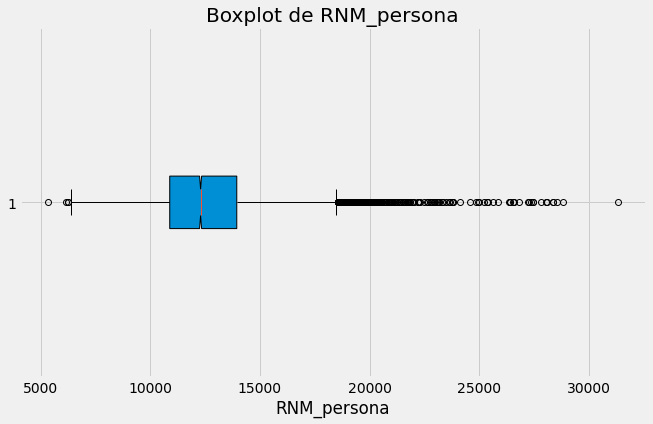

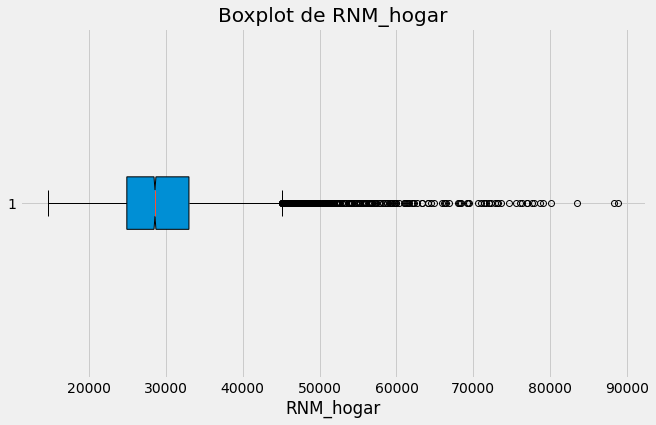

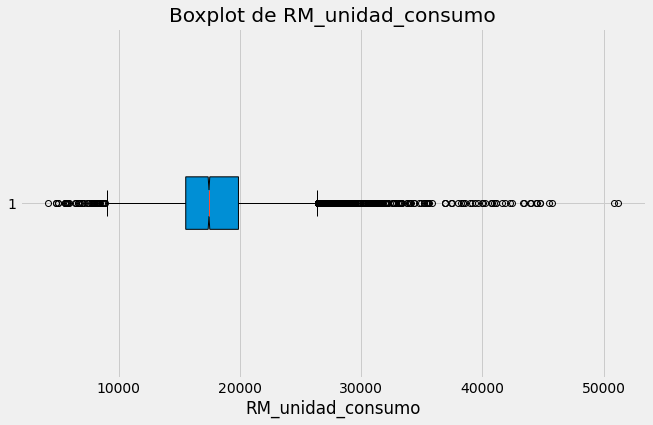

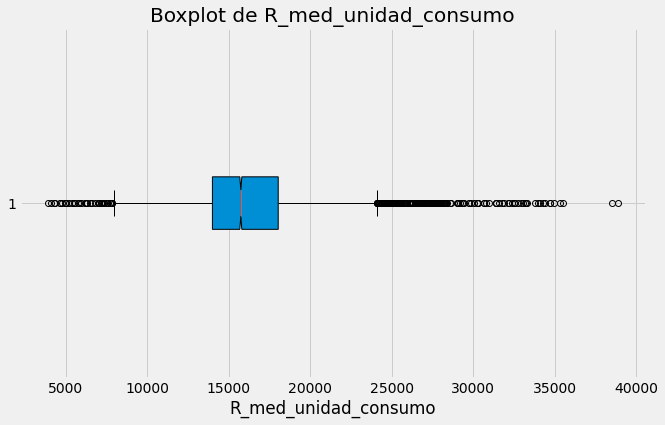

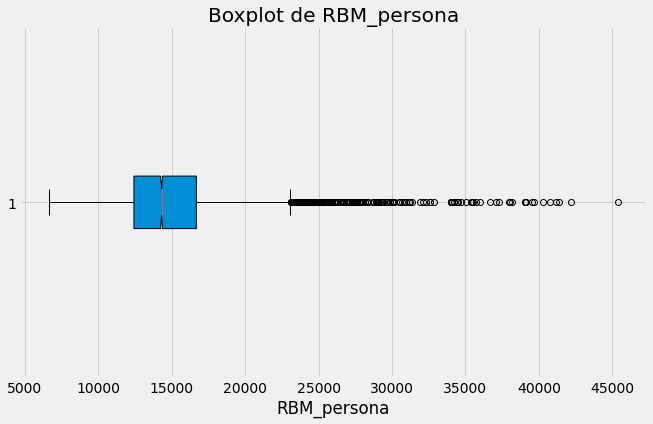

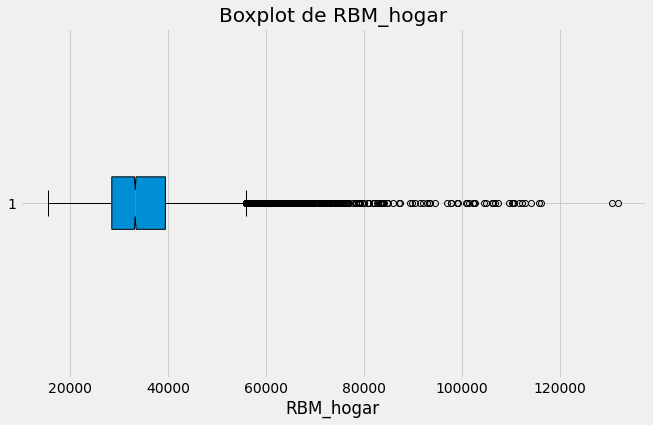

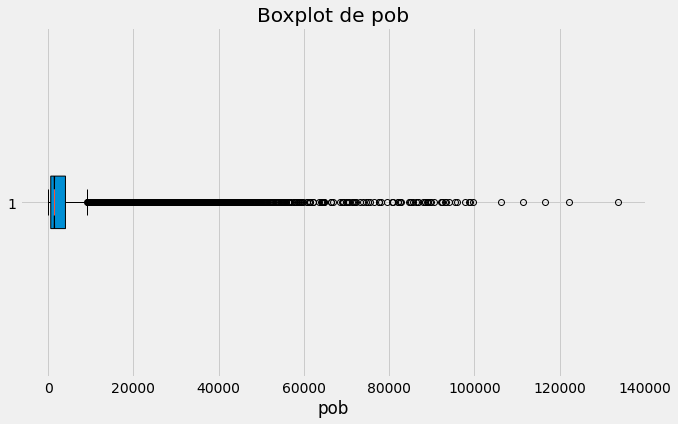

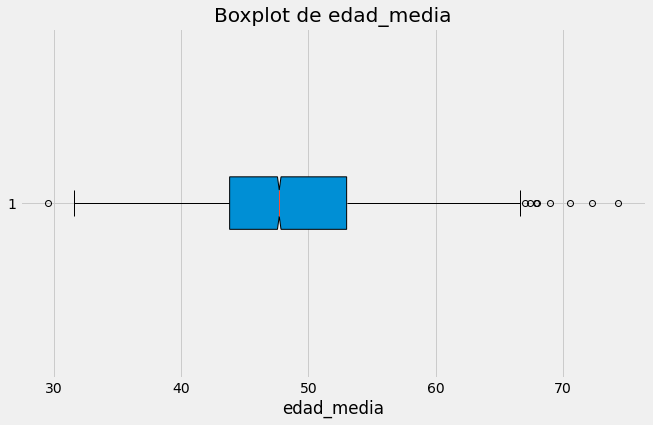

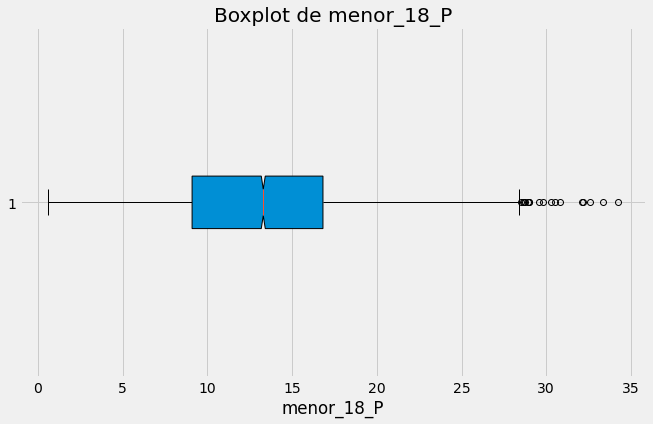

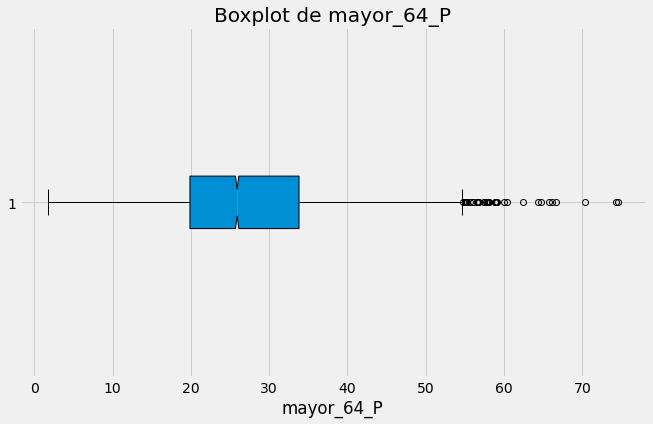

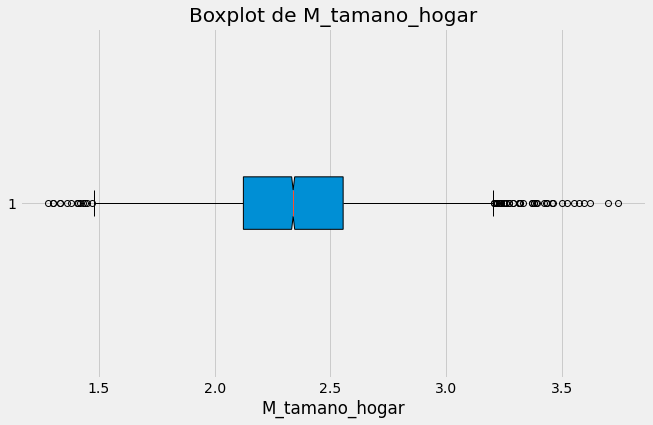

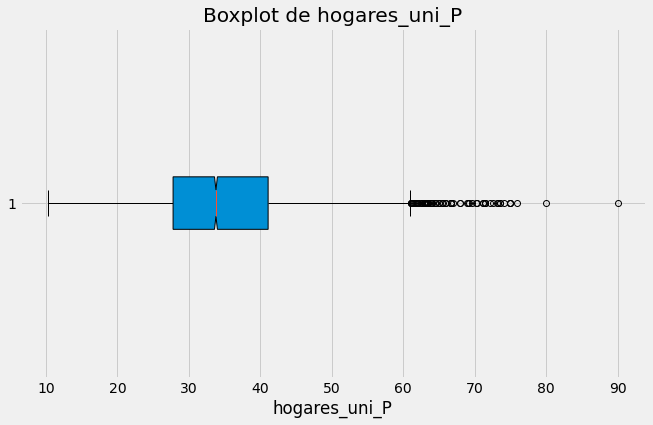

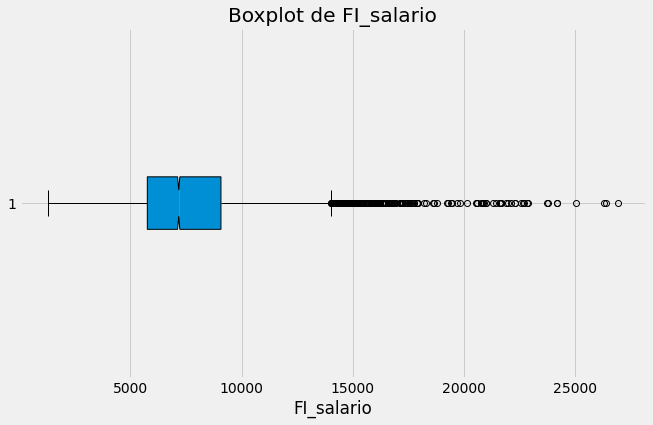

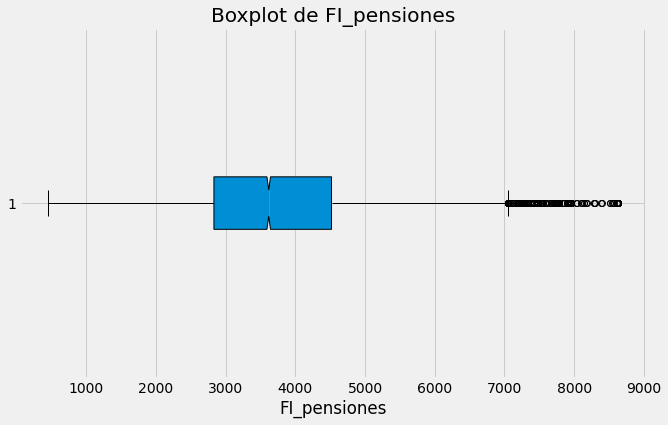

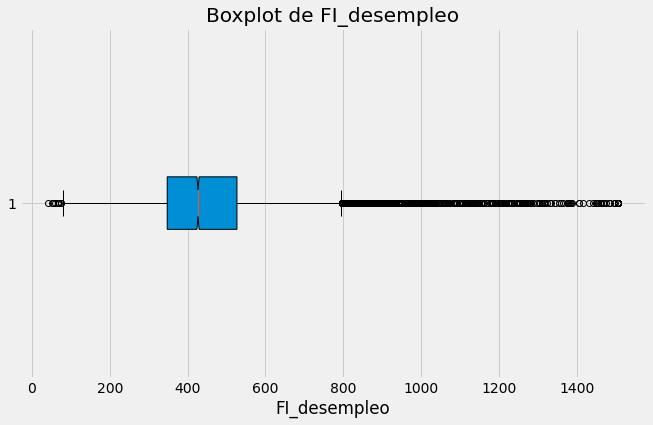

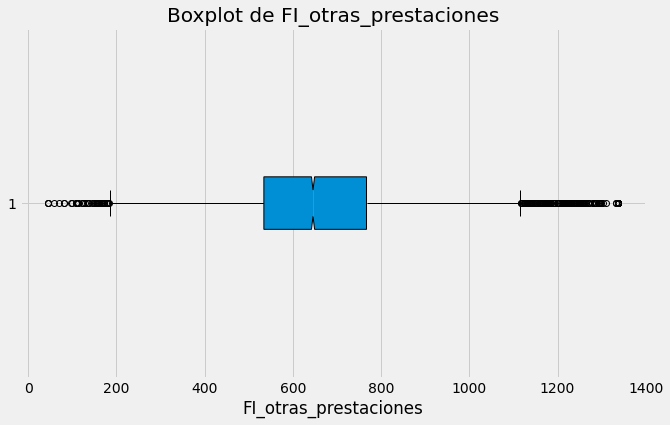

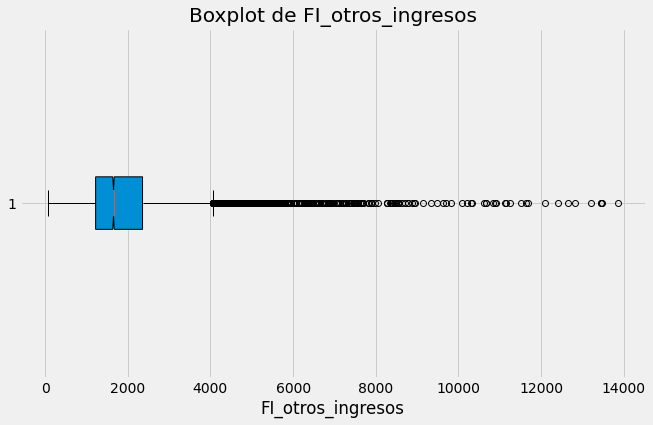

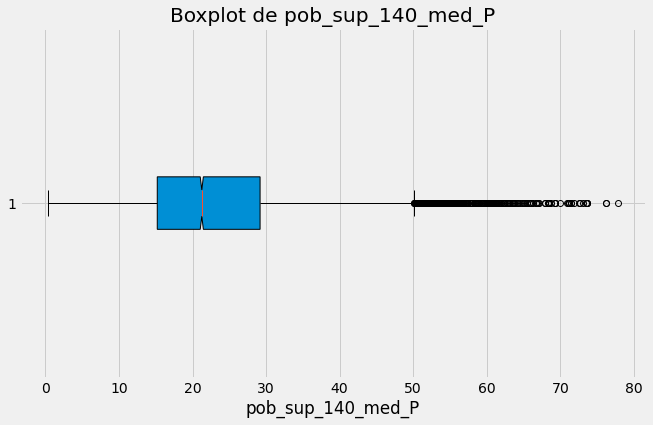

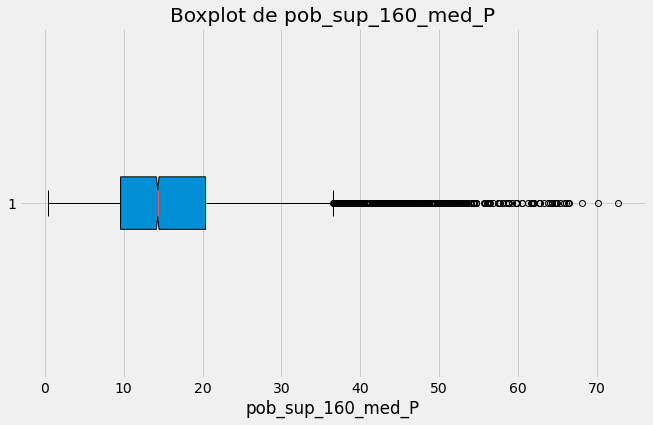

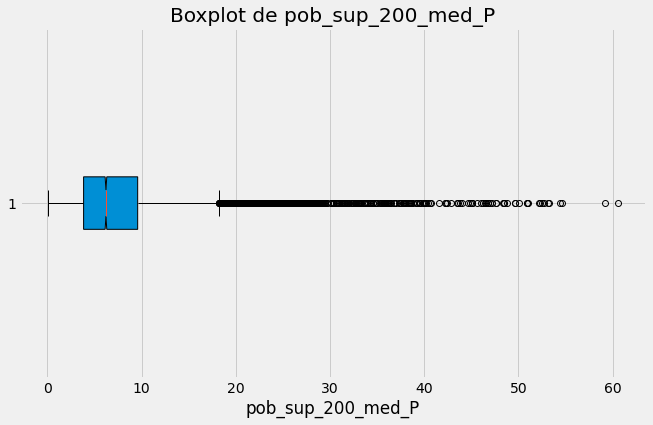

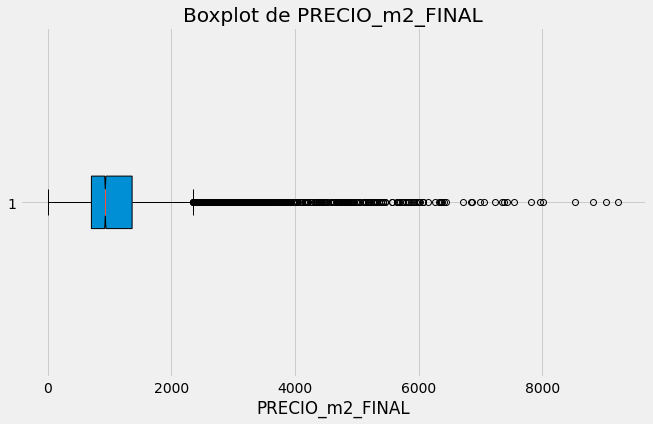

In [0]:
numeric_cols = [col for col, dtype in BBDD.dtypes if dtype in ('int', 'double')]

# Itera sobre cada columna numérica y crea un diagrama de caja y bigotes
for col in numeric_cols:
    # Calcula los cuartiles y los límites para el diagrama de caja y bigotes
    quartiles = BBDD.approxQuantile(col, [0.25, 0.5, 0.75], 0.05)
    q1, q3 = quartiles[0], quartiles[2]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filtra los valores atípicos
    outliers = BBDD.filter((BBDD[col] < lower_bound) | (BBDD[col] > upper_bound))
    
    # Convierte los datos a una lista de Python para trazar el diagrama de caja y bigotes
    data = BBDD.select(col).rdd.flatMap(lambda x: x).collect()
    
    # Crea el diagrama de caja y bigotes
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, patch_artist=True, notch=True, vert=False)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [0]:
outliers.count()

Out[10]: 956

In [0]:
BBDD_pd = BBDD.toPandas()
BBDD_pd = BBDD_pd.drop(['cp','PROV'], axis = 1)


In [0]:
#corr_matrix = BBDD_pd.drop(['PROV','cp'], axis = 1)

corr_matrix = BBDD_pd.corr().abs()


In [0]:
# Obtiene una matriz triangular superior
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Multiplica la matriz de correlaciones por la matriz triangular superior
upper = corr_matrix.where(upper_triangle)

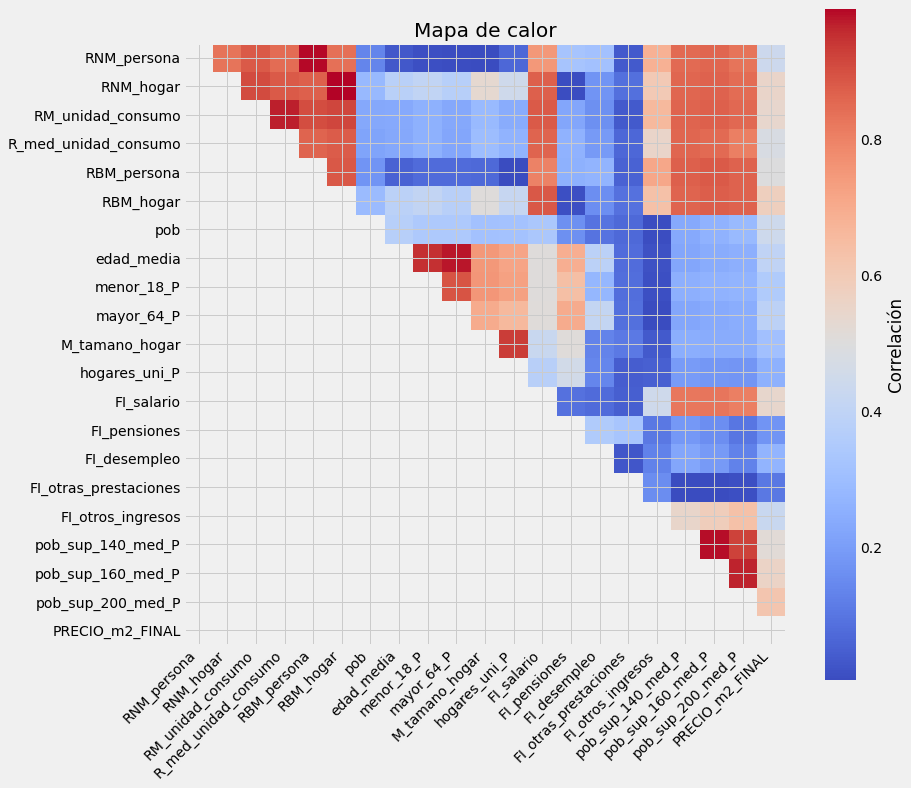

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(12, 12))
plt.imshow(upper, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlación')
plt.title('Mapa de calor')
plt.xticks(np.arange(len(upper.columns)), upper.columns, rotation = 45, ha= 'right', fontsize = '14')
plt.yticks(np.arange(len(upper.columns)), upper.columns)
plt.subplots_adjust(bottom=0.1)
plt.show()
plt.savefig('matriz_de_correlacion.png', dpi=300, bbox_inches='tight')

In [0]:
to_drop_90 = [column for column in upper.columns if any(upper[column] > 0.90)]
print(to_drop_90)
print(len(to_drop_90))

['RM_unidad_consumo', 'R_med_unidad_consumo', 'RBM_persona', 'RBM_hogar', 'menor_18_P', 'mayor_64_P', 'hogares_uni_P', 'pob_sup_160_med_P', 'pob_sup_200_med_P']
9


In [0]:
to_drop_80 = [column for column in upper.columns if any(upper[column] > 0.80)]
print(to_drop_80)
print(len(to_drop_80))

['RNM_hogar', 'RM_unidad_consumo', 'R_med_unidad_consumo', 'RBM_persona', 'RBM_hogar', 'menor_18_P', 'mayor_64_P', 'hogares_uni_P', 'FI_salario', 'pob_sup_140_med_P', 'pob_sup_160_med_P', 'pob_sup_200_med_P']
12


In [0]:
to_drop_70 = [column for column in upper.columns if any(upper[column] > 0.70)]
print(to_drop_70)
print(len(to_drop_70))

['RNM_hogar', 'RM_unidad_consumo', 'R_med_unidad_consumo', 'RBM_persona', 'RBM_hogar', 'menor_18_P', 'mayor_64_P', 'M_tamano_hogar', 'hogares_uni_P', 'FI_salario', 'FI_otros_ingresos', 'pob_sup_140_med_P', 'pob_sup_160_med_P', 'pob_sup_200_med_P']
14


In [0]:
to_drop_65 = [column for column in upper.columns if any(upper[column] > 0.65)]
print(to_drop_65)
print(len(to_drop_65))

['RNM_hogar', 'RM_unidad_consumo', 'R_med_unidad_consumo', 'RBM_persona', 'RBM_hogar', 'menor_18_P', 'mayor_64_P', 'M_tamano_hogar', 'hogares_uni_P', 'FI_salario', 'FI_pensiones', 'FI_otros_ingresos', 'pob_sup_140_med_P', 'pob_sup_160_med_P', 'pob_sup_200_med_P']
15


In [0]:
to_drop_62 = [column for column in upper.columns if any(upper[column] > 0.62)]
print(to_drop_62)
print(len(to_drop_62))

['RNM_hogar', 'RM_unidad_consumo', 'R_med_unidad_consumo', 'RBM_persona', 'RBM_hogar', 'menor_18_P', 'mayor_64_P', 'M_tamano_hogar', 'hogares_uni_P', 'FI_salario', 'FI_pensiones', 'FI_otros_ingresos', 'pob_sup_140_med_P', 'pob_sup_160_med_P', 'pob_sup_200_med_P']
15


In [0]:
to_drop_60 = [column for column in upper.columns if any(upper[column] > 0.60)]
print(to_drop_60)
print(len(to_drop_60))

['RNM_hogar', 'RM_unidad_consumo', 'R_med_unidad_consumo', 'RBM_persona', 'RBM_hogar', 'menor_18_P', 'mayor_64_P', 'M_tamano_hogar', 'hogares_uni_P', 'FI_salario', 'FI_pensiones', 'FI_otros_ingresos', 'pob_sup_140_med_P', 'pob_sup_160_med_P', 'pob_sup_200_med_P', 'PRECIO_m2_FINAL']
16


In [0]:
#Todas las variables de Renta obviamente están correladas. Podemos cambiar el orden para que el for que indica cuales dropear, deje la variable de renta que más nos interese. 
#Voy a hacer una prueba seleccionando de las variables de renta, unicamente la mediana por unidad de consumo. 

# Yo cre que hay que elegir la variable de renta en función de cual ha recibido menos imputaciones y cual es más interesante. 

# Las variables pob también van a estar correladas. 

In [0]:
BBDD_2 = BBDD.select('PROV',
 'cp',
 'R_med_unidad_consumo',
 'pob',
 'menor_18_P',
 'mayor_64_P',
 'M_tamano_hogar',
 'hogares_uni_P',
 'edad_media',
 'FI_salario',
 'FI_pensiones',
 'FI_desempleo',
 'FI_otras_prestaciones',
 'FI_otros_ingresos',
 'pob_sup_140_med_P',
 'pob_sup_160_med_P',
 'pob_sup_200_med_P',
 'PRECIO_m2_FINAL')
BBDD_2_pd = BBDD_2.toPandas()
BBDD_2_pd = BBDD_2_pd.drop(['cp','PROV'], axis = 1)
corr_matrix = BBDD_2_pd.corr().abs()
lower_triangle = np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool)
lower = corr_matrix.where(lower_triangle)


In [0]:
lower

R_med_unidad_consumo 
 pob 
 menor_18_P 
 mayor_64_P 
 M_tamano_hogar 
 hogares_uni_P 
 edad_media 
 FI_salario 
 FI_pensiones 
 FI_desempleo 
 FI_otras_prestaciones 
 FI_otros_ingresos 
 pob_sup_140_med_P 
 pob_sup_160_med_P 
 pob_sup_200_med_P 
 PRECIO_m2_FINAL 
 
 
 
 
 R_med_unidad_consumo 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 pob 
 0.218096 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 menor_18_P 
 0.257049 
 0.345357 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 mayor_64_P 
 0.225479 
 0.345762 
 0.893157 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 M_tamano_hogar 
 0.299971 
 0.316042 
 0.753363 
 0.698858 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 hogares_uni_P 
 0.262857 
 0.319660 
 0.725429 
 0.660465 
 0.930191 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 edad_media 
 0.229544 
 0.372936 
 0.949848 
 0.976623 
 0.749672 
 0.717977 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 FI_salario 
 0.859569 
 0.338343 
 0.504579 
 0.507757 
 0.425725 
 0.376916 
 0.502714 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 FI_pensiones 
 0.259474 
 0.163066 
 0.641389 
 0.697867 
 0.507154 
 0.459709 
 0.690267 
 0.088539 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 FI_desempleo 
 0.190303 
 0.095478 
 0.276354 
 0.412536 
 0.134211 
 0.141370 
 0.384295 
 0.073987 
 0.352638 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 FI_otras_prestaciones 
 0.068052 
 0.071808 
 0.081773 
 0.087411 
 0.108308 
 0.044329 
 0.079560 
 0.049217 
 0.328744 
 0.027334 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 FI_otros_ingresos 
 0.552110 
 0.010717 
 0.014273 
 0.006269 
 0.036954 
 0.052452 
 0.015930 
 0.445157 
 0.107041 
 0.126983 
 0.154617 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 pob_sup_140_med_P 
 0.856750 
 0.232833 
 0.252958 
 0.226883 
 0.247899 
 0.194898 
 0.227027 
 0.821037 
 0.186969 
 0.225162 
 0.003732 
 0.545329 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 pob_sup_160_med_P 
 0.849353 
 0.258530 
 0.262202 
 0.237027 
 0.241439 
 0.184900 
 0.239237 
 0.827496 
 0.159705 
 0.191881 
 0.003029 
 0.584570 
 0.985963 
 NaN 
 NaN 
 NaN 
 
 
 pob_sup_200_med_P 
 0.806661 
 0.286432 
 0.269336 
 0.245403 
 0.240586 
 0.180536 
 0.252756 
 0.807730 
 0.100838 
 0.130137 
 0.013207 
 0.631050 
 0.922293 
 0.964848 
 NaN 
 NaN 
 
 
 PRECIO_m2_FINAL 
 0.477226 
 0.443897 
 0.353809 
 0.389706 
 0.310978 
 0.255892 
 0.399059 
 0.543080 
 0.176271 
 0.269731 
 0.103964 
 0.425565 
 0.517378 
 0.559107 
 0.616097 
 NaN

In [0]:
len(BBDD_2.columns)-2

Out[24]: 16

In [0]:
to_drop_70 = [column for column in lower.columns if any(lower[column] > 0.7)]
print(to_drop_70)
print(len(to_drop_70))

['R_med_unidad_consumo', 'menor_18_P', 'mayor_64_P', 'M_tamano_hogar', 'hogares_uni_P', 'FI_salario', 'pob_sup_140_med_P', 'pob_sup_160_med_P']
8


In [0]:
to_drop_65 = [column for column in lower.columns if any(lower[column] > 0.65)]
print(to_drop_65)
print(len(to_drop_65))

['R_med_unidad_consumo', 'menor_18_P', 'mayor_64_P', 'M_tamano_hogar', 'hogares_uni_P', 'edad_media', 'FI_salario', 'pob_sup_140_med_P', 'pob_sup_160_med_P']
9


In [0]:
to_drop_60 = [column for column in lower.columns if any(lower[column] > 0.6)]
print(to_drop_60)
print(len(to_drop_60))

['R_med_unidad_consumo', 'menor_18_P', 'mayor_64_P', 'M_tamano_hogar', 'hogares_uni_P', 'edad_media', 'FI_salario', 'FI_otros_ingresos', 'pob_sup_140_med_P', 'pob_sup_160_med_P', 'pob_sup_200_med_P']
11


In [0]:
BBDD_3 = BBDD.select('PROV',
 'cp',
 'R_med_unidad_consumo',
 'pob',
 'edad_media',
 'menor_18_P',
 'mayor_64_P',
 'M_tamano_hogar',

 'FI_pensiones',
 'FI_desempleo',
 'FI_otras_prestaciones',
 'FI_otros_ingresos',

 'PRECIO_m2_FINAL')
BBDD_3_pd = BBDD_3.toPandas()
BBDD_3_pd = BBDD_3_pd.drop(['cp','PROV'], axis = 1)
corr_matrix = BBDD_3_pd.corr().abs()
lower_triangle = np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool)
lower = corr_matrix.where(lower_triangle)

In [0]:
to_drop_60 = [column for column in lower.columns if any(lower[column] > 0.6)]
print(to_drop_60)
print((len(BBDD_3.columns)-2)-len(to_drop_60))

['edad_media', 'menor_18_P', 'mayor_64_P']
8


In [0]:
BBDD_final = BBDD.select('PROV',
 'cp',
 'R_med_unidad_consumo',
 'pob',
 'M_tamano_hogar',
 'FI_pensiones',
 'FI_desempleo',
 'FI_otras_prestaciones',
 'FI_otros_ingresos',
 'PRECIO_m2_FINAL')

In [0]:
gen_utils.write_dlake_table(df=BBDD_final, 
                         table_path= 'BBDD_m2/BBDD_CP_0.6',
                         container='analytics', 
                         mode="overwrite",
                         environment='dev',
                         table_format="PARQUET")

In [0]:
print(outliers.count())
outliers.display()

956


PROV cp R_med_unidad_consumo pob M_tamano_hogar FI_pensiones FI_desempleo FI_otras_prestaciones FI_otros_ingresos PRECIO_m2_FINAL 35 35004 23434.056780318595 21909.0 2.6210908758957503 4388.383769227258 396.8999041489799 761.7301565566662 4044.597014925373 2498.0 38 38685 13650.0 1737.0 2.68 2091.0 1278.0 349.0 1537.0 2211.0 07 07820 17598.368751870697 23387.0 2.912458203275324 1635.0115876341558 1384.4425107965965 418.8558173344165 2639.129345362808 4388.0 07 07629 19250.0 2810.0 2.46 3190.0 704.0 464.0 2828.0 3366.0 33 33004 28257.583631049038 6158.0 2.2188307892172783 7471.011367327055 254.07908411822024 992.6071776550829 7920.192270217603 2302.0 28 28524 16450.0 1955.0 2.8999999999999995 2532.0 402.0 813.0 1844.0 2517.0 28 28039 18169.112387784255 95909.0 2.3923719358975695 3391.6297010708067 481.39972265376554 567.744361842997 1698.553211898779 3749.0 07 07711 21804.460449835733 3957.0 2.439785190801112 3330.4988627748294 867.4703057872125 443.37503158958805 6156.952741976244 3461.0 28 28500 17432.36205938749 55803.0 2.8653746214361244 2048.441159077469 526.7779510062185 502.2281239359892 1255.5519237316987 2223.5 07 07638 16450.0 2845.0 2.19 3064.0 1433.0 433.0 3111.0 3894.0 07 07810 17850.0 2472.0 2.56 2134.0 1104.0 359.0 4974.0 4996.0 50 50001 22716.73542461275 12847.0 2.1451506188215146 4811.505254144937 374.4601074180742 698.928932824784 5807.2219973534675 2321.0 08 08950 21529.746370357174 44908.0 2.6264140019595623 4160.966620646656 494.7047296695465 784.4281197114099 2711.823995724593 3452.0 17 17256 19250.0 2860.0 2.458755244755245 3599.041258741258 564.6020979020979 410.00979020979025 4639.630069930071 2717.0 28 28707 26957.56172839506 5184.0 3.1651620370370357 4139.005787037037 340.2492283950618 490.42592592592604 10915.794367283948 2924.0 07 07872 20650.0 1285.0 2.65 2131.0 1048.0 300.0 6631.0 8533.0 07 07004 19145.845130400758 43443.0 2.6968611744124478 3039.073728794052 768.765301659646 573.6184655755818 2001.3227447459888 2894.0 33 33500 16102.0783847981 5052.0 2.1627850356294536 3725.8380839271576 612.3361045130641 725.5591844813935 2767.3339271575614 2509.0 35 35299 15050.0 1623.0 2.0500000000000003 4050.0 783.0 1005.0 1841.0 3305.0 20 20280 23597.69831730769 16640.0 2.4286472355769226 3749.7800633294787 469.6549452685928 665.6773137683592 3906.818930288461 4383.0 08 08030 21612.88525781698 71543.0 2.4036034273094504 4201.623610975218 518.2424136533274 855.883846078582 1770.0715373970902 3258.0 28 28053 12731.312299557945 80759.0 2.669686350747285 2206.295645067423 495.8874552681435 608.8188189551629 595.8003813816417 2232.0 07 07713 21350.0 1388.0 2.68 3498.0 674.0 296.0 5696.0 3527.0 31 31005 17424.26704008147 13747.0 2.5223285080381177 3770.908634611188 486.27365970757256 828.2950461918964 1465.1535607768967 2145.0 28 28034 27532.87858276538 85688.0 2.7798139762860608 4957.941602091308 336.34748156101205 764.2262393800765 4069.8785710951356 3560.0 08 08006 29349.597199844433 35998.0 2.320612256236458 4687.459136618701 420.3961331185066 709.1003111283961 8636.452469581644 5279.0 11 11002 14821.166777506834 13533.0 2.3146744993719057 3840.829306140545 570.9957141801523 1101.7923594177196 926.9337175792507 2536.0 46 46003 24123.59210078311 14685.0 2.183216887980933 4278.612529792305 392.02805583929177 784.4025876744978 7397.572829417774 3048.0 08 08009 26914.777327935222 19019.0 2.2899521531100473 4583.68010936432 485.79699248120306 738.3295651716704 7219.310899626689 5418.0 07 07006 18078.791308284293 33135.0 2.7140860117700316 2892.6550475328204 770.8065489663497 653.6724309642373 2369.876656103818 3732.0 07 07720 18850.681180713236 7487.0 2.4334486443168157 3270.1648190196347 876.546013089355 509.84720181648197 2263.372913049285 2506.0 07 07712 23721.963095848278 3902.0 2.8633111225012806 3412.9671963095852 578.2532034853921 545.7196309584829 4692.27524346489 2569.0 39 39140 19250.0 1788.0 2.22 3926.0 451.0 567.0 3072.0 3014.0 28 28914 21503.725411134477 34721.0 2.816814031853922 2434.960427407045 398.

### EDA CON SWEETVIZ

In [0]:

#analyzing the dataset
feature_config = sv.FeatureConfig(skip=['PROV', 'cp'])
BBDD_pd = BBDD.toPandas()
advert_report = sv.analyze(BBDD_pd,pairwise_analysis='off')
#display the report
advert_report.show_html('/dbfs/mnt/analytics6/BBDD_m2/EDA_BBDD_CP.html')